In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
import typing
import io
import os

import torch
import numpy as np
import matplotlib.pyplot as plt

from bovo.vit.models.modeling import PretrainedResNet
from bovo.vit.utils.dataset import VitDataset
from bovo.vit.utils.data_utils import get_loader


/home/oscar/bovo/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# train_loader, test_loader = get_loader()
trainset = VitDataset(train=True, img_size=224)
testset = VitDataset(train=False, img_size=224)

In [4]:
def create_confusion_matrix (model, dataset, batch_size = 128):

    model.eval()

    n_batches = int(np.ceil(len(dataset) / batch_size))
    all_pred = []
    all_labels = []
    for batch_id in range(n_batches):
        cur_batch_size = min(batch_size, len(dataset)-batch_id*batch_size)
        imgs, labels = zip(*[dataset[i+batch_id*batch_size] for i in range(cur_batch_size)])
        imgs = torch.stack(imgs)
        all_labels.append(list(labels))
        pred = model(imgs).detach().cpu().numpy().flatten()
        all_pred.append(pred)
        
    all_pred = np.concatenate(all_pred, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    true_pos = len([0 for (label, pred) in zip(all_labels, all_pred) if label > 17 and pred > 0])
    false_pos = len([0 for (label, pred) in zip(all_labels, all_pred) if label <= 17 and pred > 0])
    false_neg = len([0 for (label, pred) in zip(all_labels, all_pred) if label > 17 and pred <= 0])
    true_neg = len([0 for (label, pred) in zip(all_labels, all_pred) if label <= 17 and pred <= 0])
    conf_mat = np.array([[true_pos, false_pos], [false_neg, true_neg]])
    plt.imshow(conf_mat, cmap ="Blues")
    for (j,i),label in np.ndenumerate(conf_mat):
        plt.text(i, j, conf_mat[j,i], ha="center", va="center")

    ax = plt.gca()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["po_bc > 17", "po_bc <= 17"])
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["prediction > 17", "prediction <= 17"])

    return all_labels, all_pred



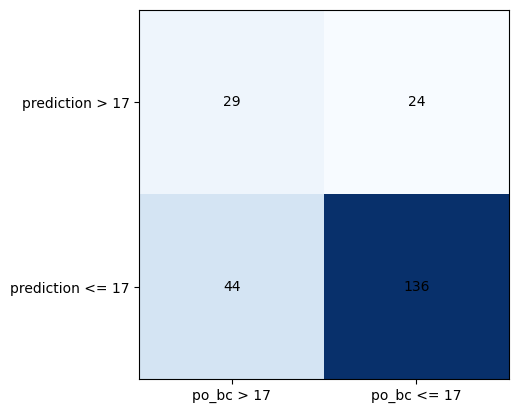

In [5]:

model = PretrainedResNet(224, reg_loss=True, model_type="res18")
model.load_state_dict(torch.load("results/models/res18_cla_checkpoint.bin"))
all_labels, all_pred = create_confusion_matrix(model, testset, 64)
plt.show()

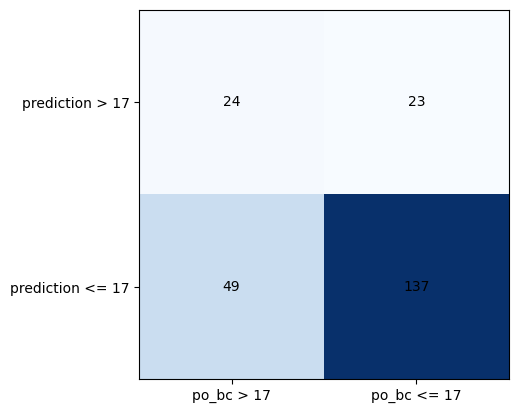

In [6]:

model = PretrainedResNet(224, reg_loss=True, model_type="res34")
model.load_state_dict(torch.load("results/models/res34_cla_checkpoint.bin"))
all_labels, all_pred = create_confusion_matrix(model, testset, 64)
plt.show()

In [7]:

model = PretrainedResNet(224, reg_loss=True, model_type="res50")
model.load_state_dict(torch.load("results/models/res50_cla_checkpoint.bin"))
all_labels, all_pred = create_confusion_matrix(model, testset, 32)
plt.show()

: 

: 

In [ ]:

model = PretrainedResNet(224, reg_loss=True, model_type="res101")
model.load_state_dict(torch.load("results/models/res101_cla_checkpoint.bin"))
all_labels, all_pred = create_confusion_matrix(model, testset, 16)
plt.show()